# 1. Using the Le-Net5-network to classify hand-written digits of the MNIST-dataset

In [253]:
# Importing the necessary libraries and modules
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image 
import PIL 
from matplotlib import pyplot as plt
import numpy as np

In [254]:
# Loading the data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

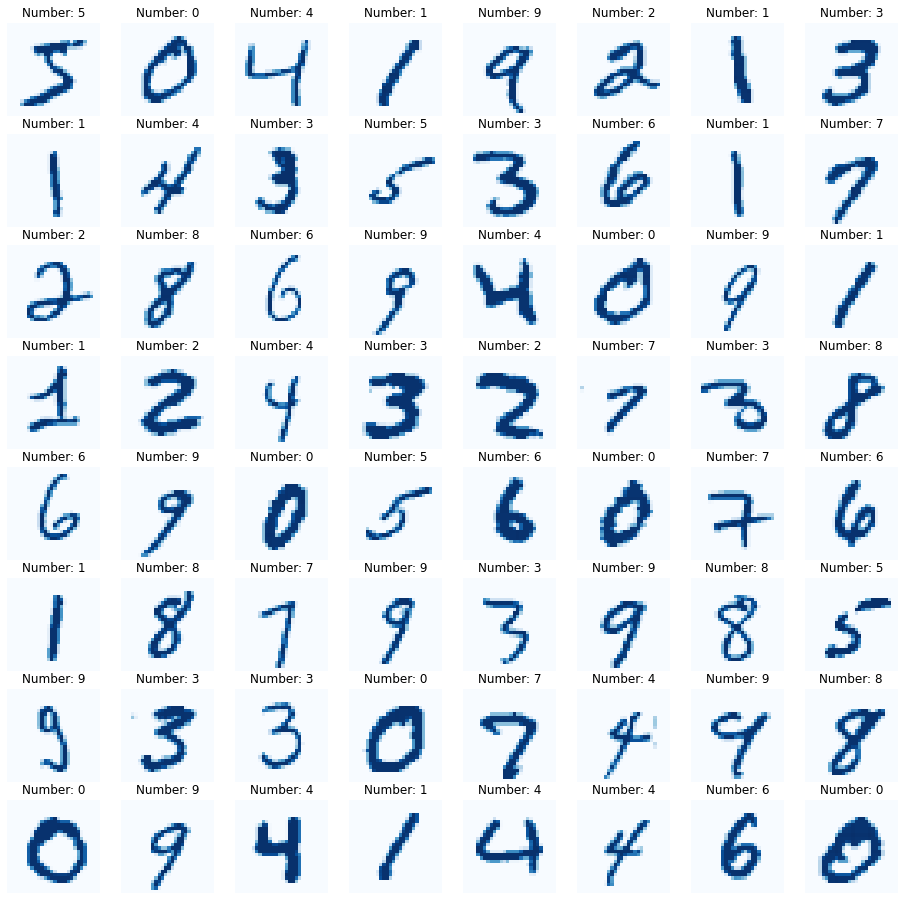

In [255]:
# Plotting the train images  with the labels
plt.figure(figsize=(16,16))
for i in range(64):
    plt.subplot(8, 8, i+1,title=f'Number: {ytrain[i]}')
    plt.imshow(xtrain[i], cmap=plt.cm.Blues)
    plt.axis('off')

In [256]:
print('xtrain shape:', xtrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')
print(xtrain[0].shape, 'image shape')
print('ytrain shape:', ytrain.shape)

xtrain shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape
ytrain shape: (60000,)


In [257]:
# Adding new axis and rescale to [0,1]
xtrain = xtrain.reshape(60000, 28, 28,1)
xtest = xtest.reshape(10000, 28, 28, 1)

Xtrain = (xtrain-np.min(xtrain))/(np.max(xtrain)-np.min(xtrain)).copy()
Xtest = (xtest-np.min(xtest))/(np.max(xtest)-np.min(xtest)).copy() 

In [258]:
# from number to categorical/dummies
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [259]:
# from categorical to number
np.argmax(ytrain,axis=1),np.argmax(ytest,axis=1)

(array([5, 0, 4, ..., 5, 6, 8]), array([7, 2, 1, ..., 4, 5, 6]))

In [260]:
print('After preprocessing:\n')
print('Xtrain shape:', Xtrain.shape)
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')
print(Xtrain[0].shape, 'image shape')
print('ytrain shape:', ytrain.shape)

After preprocessing:

Xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape
ytrain shape: (60000, 10)


In [276]:
K.clear_session()
model = Sequential([
### Implementation of LeNet-5 
    Conv2D(6, kernel_size=(5,5),strides=(1,1),
           activation='relu',input_shape=Xtrain[0].shape,
           padding='valid'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'),
    
    
    Conv2D(16, kernel_size=(5,5),strides=(1,1),
           activation = 'relu', padding = 'valid'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'),
    
    
    Flatten(),
    
    Dense(120,activation='relu'),
    
    Dense(86,activation='relu'),
    
    Dense(10,activation = 'softmax')
    
])

In [277]:
#Building the computation graph
model.compile(optimizer='rmsprop', # type of Gradient Descent 'rmsprop'
              loss='categorical_crossentropy', # multiclass: 'categorical_crossentropy'
              metrics=['accuracy'])

In [278]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 86)                1

In [279]:
# Training the model
h = model.fit(Xtrain, ytrain, epochs=10,batch_size=150,
                    validation_split = 0.2)

Epoch 1/10
320/320 [==============================] - 9s 24ms/step - loss: 0.3580 - accuracy: 0.8918 - val_loss: 0.1096 - val_accuracy: 0.9663
Epoch 2/10
320/320 [==============================] - 6s 20ms/step - loss: 0.1012 - accuracy: 0.9682 - val_loss: 0.1011 - val_accuracy: 0.9707
Epoch 3/10
320/320 [==============================] - 6s 20ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0760 - val_accuracy: 0.9780
Epoch 4/10
320/320 [==============================] - 8s 25ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.0578 - val_accuracy: 0.9821
Epoch 5/10
320/320 [==============================] - 10s 30ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0586 - val_accuracy: 0.9828
Epoch 6/10
320/320 [==============================] - 9s 29ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0472 - val_accuracy: 0.9865
Epoch 7/10
320/320 [==============================] - 10s 30ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0439 - val_accuracy: 0.98

In [281]:
h.history

{'loss': [0.35804128646850586,
  0.10122586786746979,
  0.0678999200463295,
  0.05252785235643387,
  0.042171940207481384,
  0.0352722629904747,
  0.029477959498763084,
  0.025439519435167313,
  0.022419162094593048,
  0.01910606399178505],
 'accuracy': [0.8918333053588867,
  0.9681666493415833,
  0.9788958430290222,
  0.9833750128746033,
  0.9867916703224182,
  0.9886249899864197,
  0.9903541803359985,
  0.9916666746139526,
  0.9927083253860474,
  0.9938333630561829],
 'val_loss': [0.10961644351482391,
  0.10108320415019989,
  0.07598385959863663,
  0.05781908705830574,
  0.058557190001010895,
  0.047241780906915665,
  0.04388834163546562,
  0.05292125791311264,
  0.04514431580901146,
  0.0448642261326313],
 'val_accuracy': [0.9662500023841858,
  0.9706666469573975,
  0.9779999852180481,
  0.9820833206176758,
  0.9828333258628845,
  0.9865000247955322,
  0.9877499938011169,
  0.9860833287239075,
  0.987583339214325,
  0.9881666898727417]}

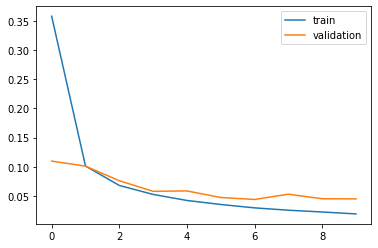

In [282]:
# plot the learning curves ('loss', 'val_loss')
plt.plot(h.history['loss'],label='train')  # <-- loss for the training portion
plt.plot(h.history['val_loss'],label='validation') # <-- validation portion
#plt.ylim((0.0,2))
plt.legend();

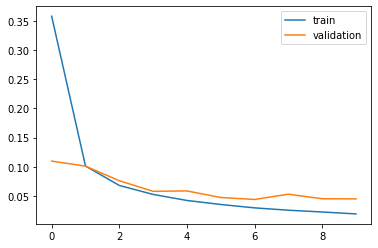

In [283]:
# plot the accuracy curves ('accuracy', val_accuracy)

# plot the learning curve
plt.plot(h.history['loss'],label='train')  # <-- loss for the training portion
plt.plot(h.history['val_loss'],label='validation') # <-- validation portion
#plt.ylim((0.0,2))
plt.legend();

In [284]:
# evaluate the model 
model.evaluate(x=Xtest, y=ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.0331 - accuracy: 0.9906


[0.03306948021054268, 0.9905999898910522]

In [285]:
np.argmax(model.predict(Xtrain[0:1]))

5

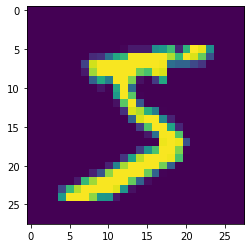

In [286]:
plt.imshow(xtrain[0])

## 1.1 Predictions and limits of the model

In [287]:
import cv2

### 1.2 Number 5

In [288]:
im_5 = cv2.imread("/home/nisaba/Pictures/Webcam/2021-10-21-112215.jpg")

In [289]:
im_5.shape

(540, 960, 3)

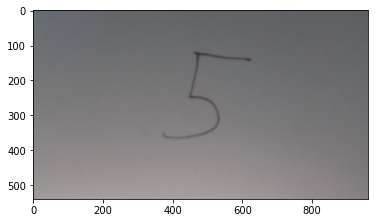

In [290]:
plt.imshow(im_5)

In [291]:
def process_num(image,top, bottom, left, right):
    """turns a picture of a handwritten digit into greyscale,
    chops it according to parameters,
    resizes to 28,28,
    and reshapes to (1,28,28)"""
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    number = grey[top:bottom, left:right]
    resized = cv2.resize(number,
                         dsize=(28,28),
                         interpolation=cv2.INTER_CUBIC)
    reversed = cv2.bitwise_not(resized)
    good_to_go = reversed.reshape(1, 28,28, 1) 
    return good_to_go

In [292]:
im_5g= process_num(im_5, 100, 400, 380, 630)

In [293]:
im_5g.shape

(1, 28, 28, 1)

In [346]:
model.predict(im_5g)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [347]:
np.argmax(model.predict(im_5g))

7

### 1.3 Seven with bar

#### the MNIST-dataset was made in the English-speaking world. There it is more customary to write the number 7 without a bar, as opposed to e.g. Germany. I want to test if the model can cope wtih that

In [348]:
sevenbar = cv2.imread("/home/nisaba/Pictures/Webcam/seven_bar.jpg")

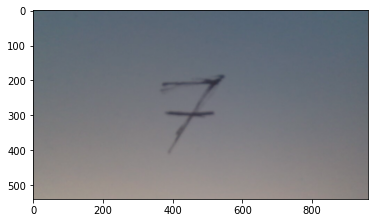

In [349]:
plt.imshow(sevenbar) 

In [350]:
#-mean /std

In [351]:
sevenbar.shape

(540, 960, 3)

In [352]:
sevenbar_p= process_num(sevenbar, 180, 430, 350, 600)

In [353]:
sevenbar_p.shape

(1, 28, 28, 1)

In [354]:
model.predict(sevenbar_p)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [355]:
np.argmax(model.predict(sevenbar_p))

7

### 1.4 Seven without a bar

In [356]:
sevenwb = cv2.imread("/home/nisaba/Pictures/Webcam/seven_wb.jpg")

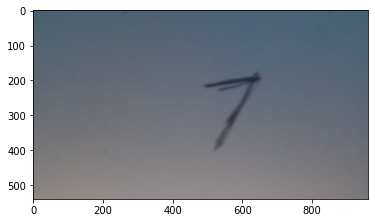

In [359]:
plt.imshow(sevenwb)

In [362]:
sevenwb_p= process_num(sevenwb, 180, 430, 350, 600)

In [363]:
sevenwb_p.shape

(1, 28, 28, 1)

In [365]:
model.predict(sevenwb_p)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [366]:
np.argmax(model.predict(sevenwb_p))

7

# 2. Testing the model against history

#### In the following paragraph I test the model against two historical sources: The book "Alte Armathur und Ringkunst" by the fencing master Hans Talhofer. The book is especially interesting because at the time it was written arabic numerals were still seen as "esoteric" and were not in common use in Europe. The other manuscript is the "Codex Vigilianus" written in 970 in Spain. It is the first book made in Europe that has, as a note, written arabic numerals that were at that time only known in the islamic world

### 2.1 Nine Hans Talhofer Fechtbuch Ms. 290 (1459 AC)

In [367]:
htnine = cv2.imread("/home/nisaba/Pictures/Webcam/talhoffer_neun.jpg")

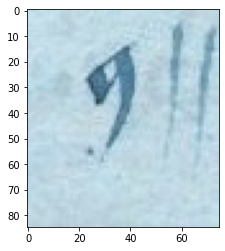

In [368]:
plt.imshow(htnine)

In [369]:
htnine_p= process_num(sevenwb, 10, 60, 20, 42)

In [370]:
model.predict(htnine_p)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [371]:
np.argmax(model.predict(htnine_p))

7

### 2.2 Three Hans Talhofer Fechtbuch Ms. 290 (1459 AC)

In [372]:
htthree = cv2.imread("/home/nisaba/Pictures/Webcam/htthree.jpg")

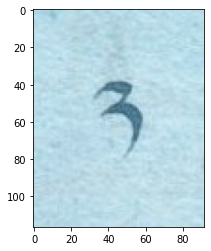

In [374]:
plt.imshow(htthree)

In [375]:
htthree_p= process_num(htthree, 39, 85, 30, 65)

In [376]:
model.predict(htthree_p)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [377]:
np.argmax(model.predict(htthree_p))

7

### 2.3 Five Codex Vigilanus (970 AC)

In [378]:
fivew = cv2.imread("/home/nisaba/Pictures/Webcam/five_vigilanus_970.jpg")

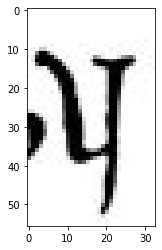

In [379]:
plt.imshow(fivew)

In [380]:
fivew.shape

(56, 33, 3)

In [381]:
fivew_r = process_num(fivew, 10, 52, 1, 28)

In [382]:
fivew_r.shape

(1, 28, 28, 1)

In [383]:
model.predict(fivew_r)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [384]:
np.argmax(model.predict(fivew_r))

4

### 2.4 Three Codex Vigilanus (970 AC)

In [402]:
threew = cv2.imread("/home/nisaba/Pictures/Webcam/Three_vigilanus.jpg")

In [403]:
threew.shape

(59, 40, 3)

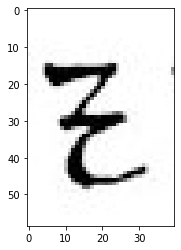

In [404]:
plt.imshow(threew)

In [405]:
threew_p = process_num(threew, 13, 50, 1, 34)

In [406]:
model.predict(threew_p)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [407]:
np.argmax(model.predict(threew_p))

2

### 2.5 Two Codex Vigilanus (970 AC)

In [395]:
twow = cv2.imread("/home/nisaba/Pictures/Webcam/two_vigilanus.jpg")

In [396]:
twow.shape

(49, 35, 3)

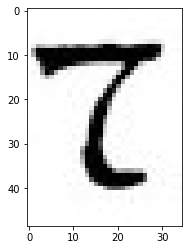

In [397]:
plt.imshow(twow)

In [398]:
twow = process_num(twow, 9, 45, 1, 32)

In [399]:
model.predict(twow)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [400]:
np.argmax(model.predict(twow))

1

#### It is clear, that the model based on the MNIST-set was not able to descern the older numerals. The examples from the "Fechtbuch" show, that the unround strokes -in contrast to the ronded ones used in handwriting confuse the model to see the "3" as a "7". The numerals from the Codex Vigilanus are way to different for the model to give a correct answer. To be fair, even most people nowadays would interpret the "2" as "1". Therefore the job done my the model was not too bad